Generate 2D distribution used in Fig. 2(b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num_patches_per_file = 10000000
patch_height = 1
patch_width = 2
output_folder = './'

# define the function to sample from
def P(X, Y):
    # return 3*(1 - X)**2 * np.exp(-X**2 - (Y + 1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2 - Y**2) - 1./3*np.exp(-(X + 1)**2 - X**2)
    # return np.cos(np.sqrt((X)**2+(Y)**2)) + 1
    return (1 / (2 * np.pi)) * np.exp(-0.5 * (X**2 + Y**2))

# choose a range for X and Y
x_range = (-3, 3)
y_range = (-3, 3)

# define a function that finds the maximum value of P over the ranges
def find_max():
    x = np.linspace(*x_range, 1000)
    y = np.linspace(*y_range, 1000)
    X, Y = np.meshgrid(x, y)
    return P(X, Y).max()

p_max = find_max()

patches = []
for _ in range(num_patches_per_file):
    accepted = False
    while not accepted:
        # generate a proposal
        x_proposal = np.random.uniform(*x_range)
        y_proposal = np.random.uniform(*y_range)
        # generate a uniform random number
        u = np.random.uniform(0, p_max)
        # if the uniform number is less than the function evaluated at the proposal, accept the proposal
        if u < P(x_proposal, y_proposal):
            patches.append([x_proposal, y_proposal])
            accepted = True

patches = np.stack(patches)
patches = patches.astype('float32')


# Find the minimum and maximum of patches
min_val = patches.min()
max_val = patches.max()

# Rescale patches to [0, 1]
patches = (patches - min_val) / (max_val - min_val)

patches = patches[:, np.newaxis, :]

with open(output_folder + f'artificial_normal_{patch_height}x{patch_width}patches.pickle', 'bw') as f:
    pickle.dump(patches, f, -1)

In [2]:
patches.shape

(10000000, 1, 2)

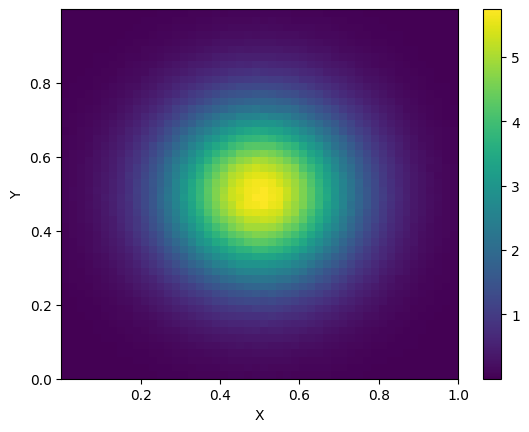

In [3]:
import matplotlib.pyplot as plt

# Unpack the patches
X, Y = patches[:,0, 0], patches[:,0, 1]

# Create a 2D histogram
plt.hist2d(X, Y, bins=50, density=True)

# Show the color bar
plt.colorbar()

# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()
